In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

In [609]:
a = 1
dt = .01
Nx = 100
Ny = 100
dx = 1./Nx
dy = 1./Ny
mux = a * dt / (dx**2)
muy = a * dt / (dy**2)

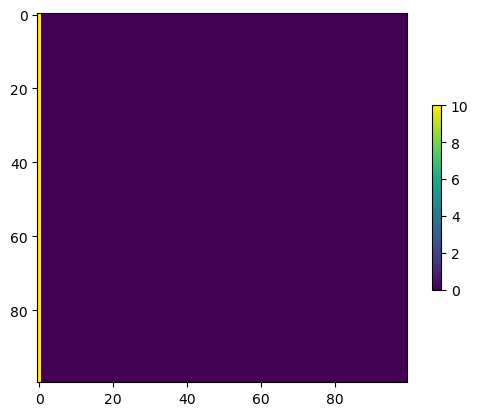

In [610]:
#def init(x, y):
#    return -2*((x-.5)**2 + (y-.5)**2)
X, Y = np.meshgrid(np.linspace(0, 1, Nx), np.linspace(0, .5, Ny))
U = np.zeros(X.shape)
U[:,0] = 10.
init = plt.imshow(U, cmap='viridis')
plt.colorbar(init, ax=plt.gca(), shrink=.5)

In [612]:
#LHS = sp.bmat([
#    [B if i==j else A if abs(i-j)==1 else None for j in range(Nx)]
#    for i in range(Nx)]
#)
N = Ny*Nx
LHS = sp.diags([
    np.ones(N) * (1+(mux+muy)),
    np.ones(N) * (-muy/2),
    np.ones(N) * (-muy/2),
    np.ones(N) * (-mux/2),
    np.ones(N) * (-mux/2)
], offsets=[0,1,-1, Ny, -Ny], shape=[N,N])

In [613]:
print(LHS.toarray())

[[201. -50.   0. ...   0.   0.   0.]
 [-50. 201. -50. ...   0.   0.   0.]
 [  0. -50. 201. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 201. -50.   0.]
 [  0.   0.   0. ... -50. 201. -50.]
 [  0.   0.   0. ...   0. -50. 201.]]


In [615]:
#RHS = sp.bmat([
#    [Br if i==j else -A if abs(i-j)==1 else None for j in range(Nx)]
#    for i in range(Nx)]
#)
RHS = sp.diags([
    np.ones(N) * (1-(mux+muy)),
    np.ones(N) * (muy/2),
    np.ones(N) * (muy/2),
    np.ones(N) * (mux/2),
    np.ones(N) * (mux/2)
], offsets=[0,1,-1, Ny, -Ny], shape=[N,N])

In [616]:
print(RHS.toarray())

[[-199.   50.    0. ...    0.    0.    0.]
 [  50. -199.   50. ...    0.    0.    0.]
 [   0.   50. -199. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -199.   50.    0.]
 [   0.    0.    0. ...   50. -199.   50.]
 [   0.    0.    0. ...    0.   50. -199.]]


In [617]:
print(RHS.shape, LHS.shape, U.flatten(order='F').shape, sep='\n')
print((RHS@U.flatten(order='F')).shape)

(10000, 10000)
(10000, 10000)
(10000,)
(10000,)


In [618]:
u = U.flatten(order='F')
sols = [U]
for i in range(int(1/dt)):
    u = sp.linalg.spsolve(LHS, RHS @ u)
    if i%10==1:
        sols.append( u.reshape(U.shape, order='F'))

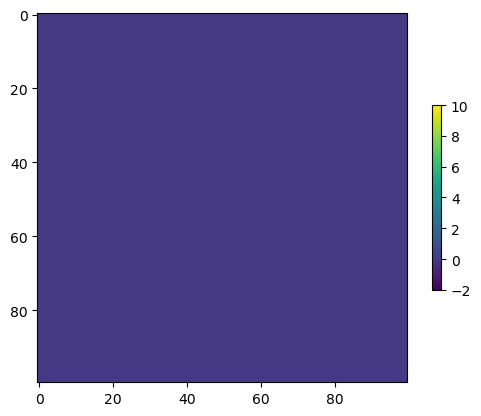

In [619]:
sol = plt.imshow(u.reshape(U.shape, order='F'), cmap='viridis')
fig.colorbar(sol, ax=plt.gca(), shrink=.5)
plt.clim(-2,10)
plt.show()

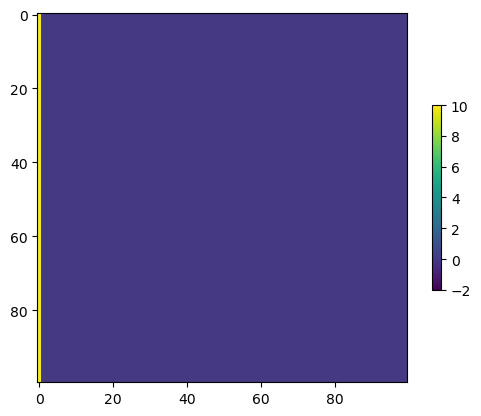

In [620]:
init = plt.imshow(U, cmap='viridis')
fig.colorbar(init, ax=plt.gca(), shrink=.5)
plt.clim(-2,10)
plt.show()

In [621]:
def plot_solutions():
    N = sols[0].shape[0]-1
    X, Y = np.meshgrid(np.linspace(0,1,Nx), np.linspace(0,1,Ny))
    fig = plt.figure(figsize=(10,10))
    # Orders the subplots nicely through matplotlib hacks
    ax_dict = fig.subplot_mosaic(
        [
            ['c0'  , 'c2'  , 'c4'],
            ['c6'  , 'c8'  , 'c10']
        ]
    )
    fig.suptitle(
        f'5 step convergence for Crank Nicholson diffusion',
        fontsize=16, fontweight='bold'
    )
    for name, ax in ax_dict.items():
        if name != 'conv':
            ss = ax.get_subplotspec()                    # type: ignore
            ax.remove()
            ax = fig.add_subplot(ss, projection='3d')
            cycles = int(name[1:])
            ax.plot_surface(X, Y, sols[cycles])           # type: ignore
            ax.set_title(f'{cycles} steps', fontweight='bold')
    plt.show()

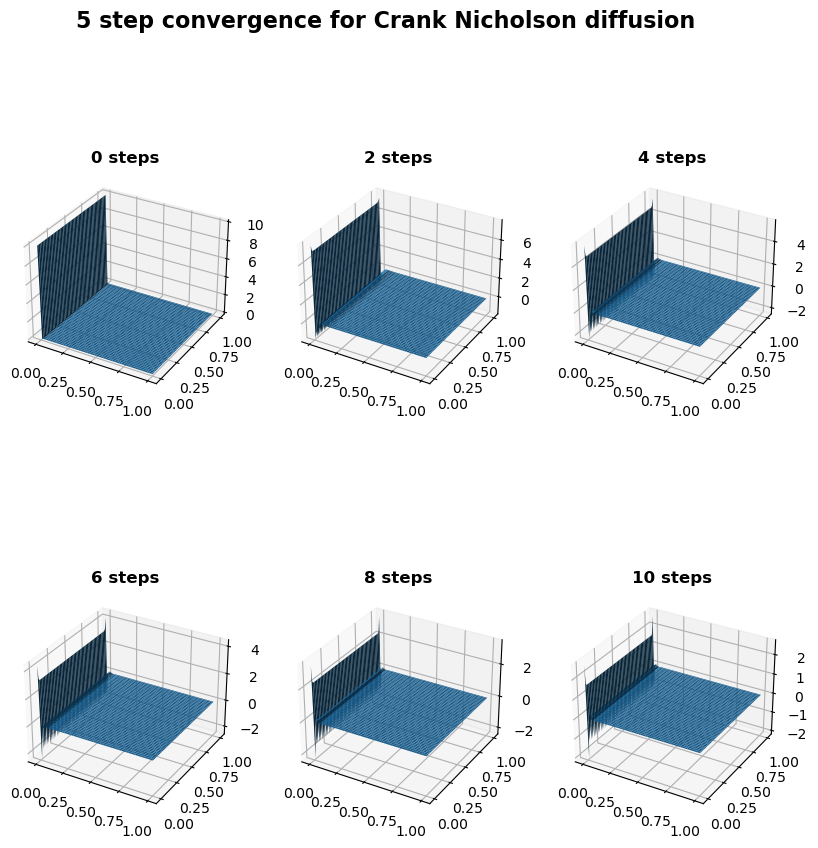

In [622]:
plot_solutions()

(10000, 10000)
(101, 101)
49798


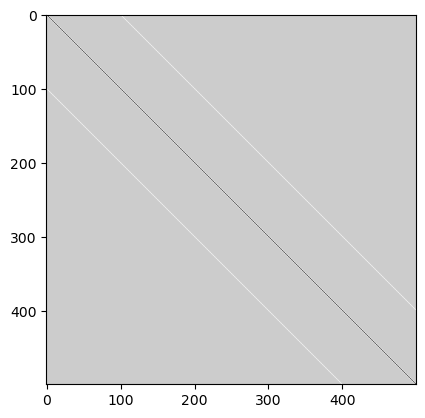

In [582]:
plt.imshow(RHS.toarray()[:500,:500], cmap="gray")
print(RHS.shape)
print(B.shape)
print(RHS.nnz)

In [208]:
def plot_imshows():
    N = sols[0].shape[0]-1
    #X, Y = np.meshgrid(np.linspace(0,1,N+1), np.linspace(0,1,N+1))
    fig = plt.figure(figsize=(10,10))
    # Orders the subplots nicely through matplotlib hacks
    ax_dict = fig.subplot_mosaic(
        [
            ['c0'  , 'c2'  , 'c4'],
            ['c6'  , 'c8'  , 'c10']
        ]
    )
    fig.suptitle(
        f'5 step convergence for Crank Nicholson diffusion',
        fontsize=16, fontweight='bold'
    )
    for name, ax in ax_dict.items():
        if name != 'conv':
            #ss = ax.get_subplotspec()                    # type: ignore
            #ax.remove()
            #ax = fig.add_subplot(ss, projection='3d')
            cycles = int(name[1:])
            ax.imshow(sols[cycles])           # type: ignore
            ax.set_title(f'{cycles} steps', fontweight='bold')
    plt.show()

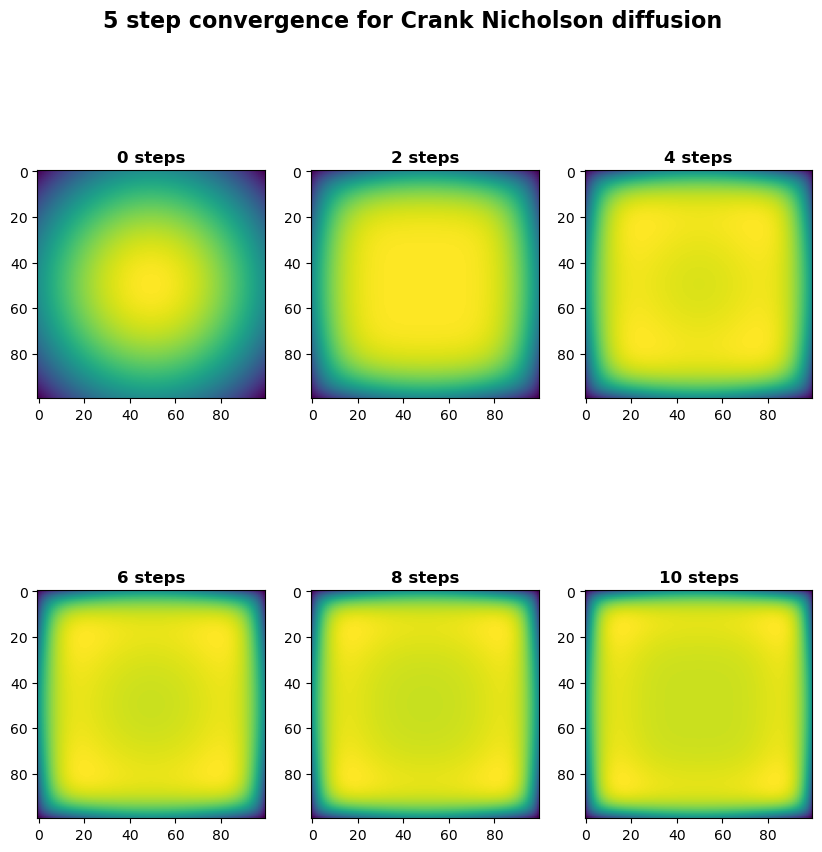

In [209]:
plot_imshows()

In [222]:
test = np.array([[1,2,3],[4,5,6]])
print(test)
print()
flattest = test.flatten(order="F")
print(flattest)
print()
print(flattest.reshape(test.shape, order='F'))

[[1 2 3]
 [4 5 6]]

[1 4 2 5 3 6]

[[1 2 3]
 [4 5 6]]


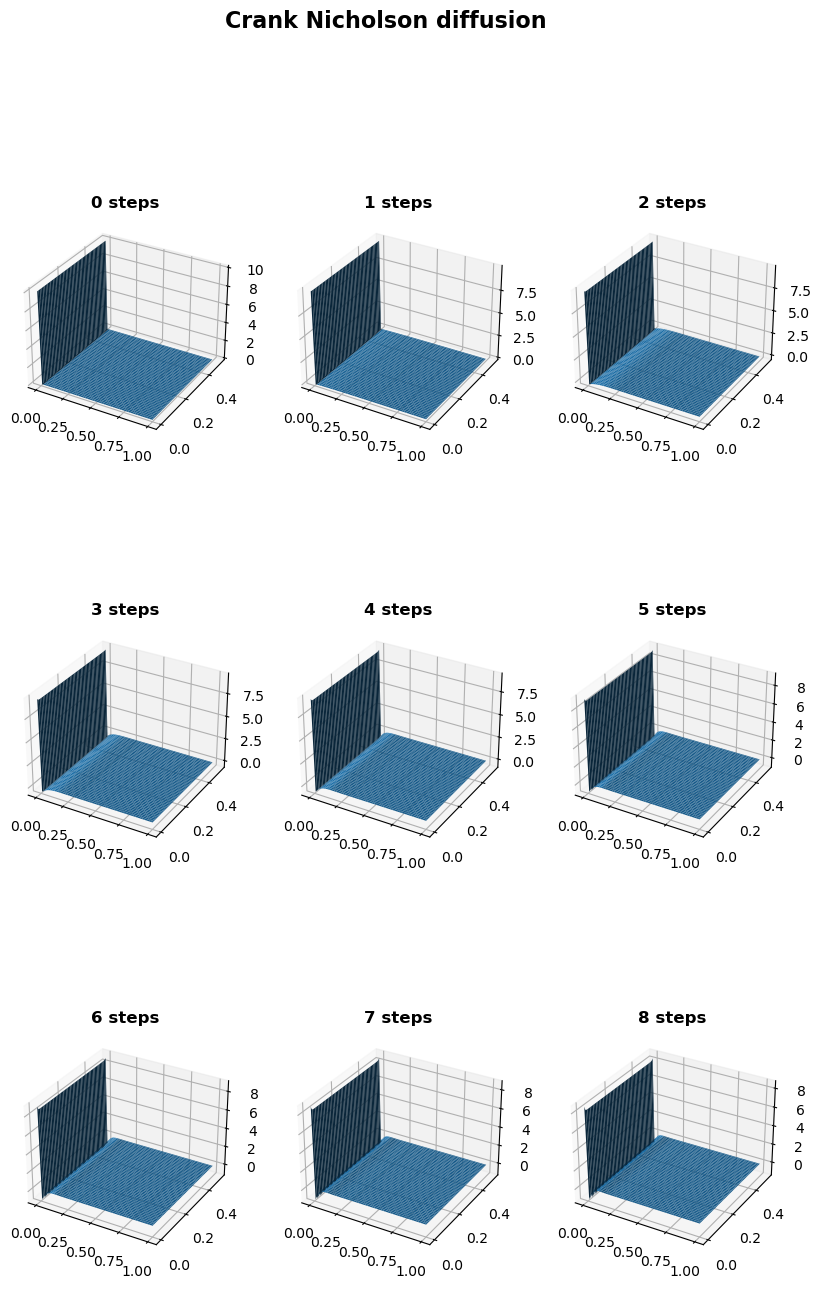

In [580]:
fig = plt.figure(figsize=(10,15))
# Orders the subplots nicely through matplotlib hacks
X, Y = np.meshgrid(np.linspace(0,1,Nx), np.linspace(0,.5,Ny))
ax_dict = fig.subplot_mosaic(
    [
        ['c0'  , 'c1'  , 'c2'],
        ['c3'  , 'c4'  , 'c5'],
        ['c6'  , 'c7'  , 'c8'],
    ]
)
fig.suptitle(
    f'Crank Nicholson diffusion',
    fontsize=16, fontweight='bold'
)
i = 0
for name, ax in ax_dict.items():
    ss = ax.get_subplotspec()                    # type: ignore
    ax.remove()
    ax = fig.add_subplot(ss, projection='3d')
    cycles = int(name[1:])
    ax.plot_surface(X, Y, sols[i])           # type: ignore
    ax.set_title(f'{cycles} steps', fontweight='bold')
    i += 1

In [584]:
10000 + (9999*2) + (10000-100)*2

49798